<a href="https://colab.research.google.com/github/Faith03-hub/budgeting-project/blob/main/BUDGET_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Data Science /"


 Mall_Customers.csv  'What is data engineering.gdoc'


In [ ]:
budget = pd.read_csv('/content/drive/My Drive/Data Science /Mall_Customers.csv')


In [ ]:
budget.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
budget.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
budget.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


**DATA PREPROCESSING: FEATURE SCALING**


 We are using K-Means clustering, a machine learning technique, to group users based on their financial behavior. This helps us understand different spending patterns and provide smarter budget recommendations.

 Since k-means uses numerical values we will take the columns with int type
 that is annual spending and spending score

 We standardized the data using StandardScaler to ensure all values are on the same scale (this prevents bias in clustering).


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical columns
X = budget[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Find the Best Number of Clusters (K)**

We used the Elbow Method, which plots the variation in data clustering.

The optimal K is where the plot forms an "L" shape—this is where adding more clusters doesn't significantly improve the separation.

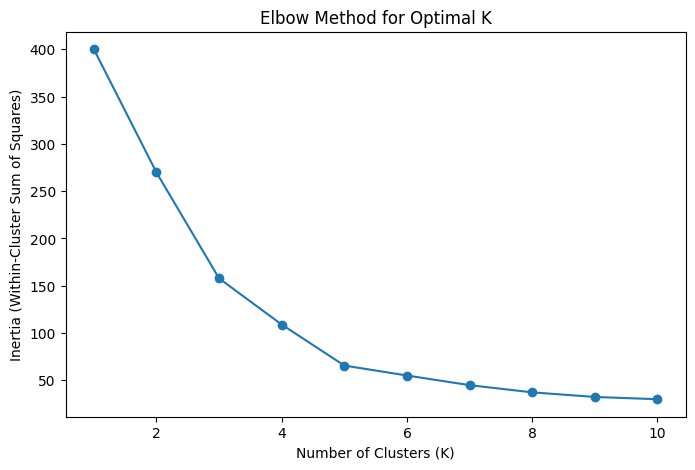

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define range of K values
k_values = range(1, 11)  # Trying K from 1 to 10
inertia = []

# Compute K-Means for each K and store inertia (distortion)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:
.

**Apply K-Means Clustering**

We ran K-Means clustering with our chosen K value, I used K=4 from the visualization above

The model grouped customers into different spending categories based on their income and spending habits.

Each person in the dataset is now labeled with a cluster number

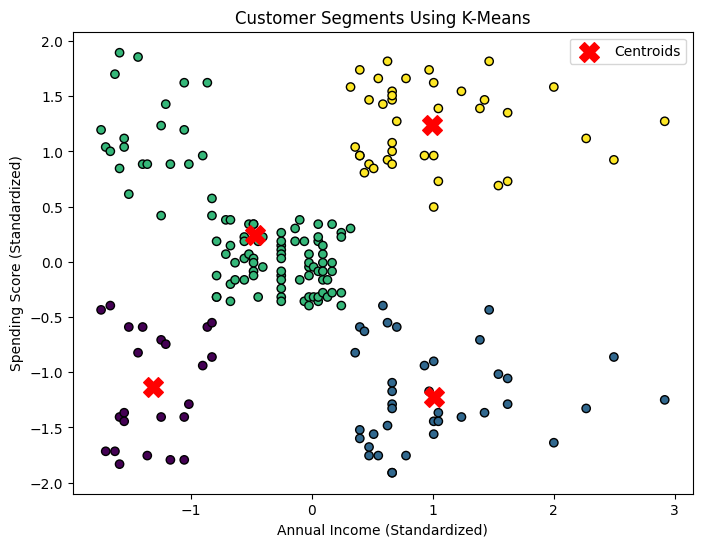

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolors='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Annual Income (Standardized)")
plt.ylabel("Spending Score (Standardized)")
plt.title("Customer Segments Using K-Means")
plt.legend()
plt.show()


In [ ]:
!pip install gemini-api


In [ ]:
!pip install google-generativeai


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Data Science /BUDGET_KMEANS


[Errno 2] No such file or directory: '/content/drive/My Drive/Data Science /BUDGET_KMEANS'
/content


In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
